<a href="https://colab.research.google.com/github/Alonso-Celis/Simplex/blob/master/PSant%C3%A9_01_notebooknettoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet 2. Notebook de nettoyage

### Sommaire

*   Chargement at affichage de donnéés
*   Visualisation et traitement de valeurs manquantes
    * Valeurs manquantes
    * Doublons
*   Marques et produits vendus en France
*   Outliers



# Chargement et affichage de données

Nous allons nettoyer le jeu de donnés [Open Food Facts](https://world.openfoodfacts.org/), une base de données sur les produits alimentaires faite par tout le monde, pour tout le monde. Les variables sont définies à [cette adresse](https://world.openfoodfacts.org/data/data-fields.txt). Ce nettoyage est fait en gardant en tête la nature de notre idée d'application, laquelle sera détaillée plus tard. Commençons par importer les libraries dont nous aurons besoin puis avec le chargement et affichage de données. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline
%load_ext google.colab.data_table

In [2]:
!wget https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv

--2020-12-04 15:41:54--  https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv
Resolving static.openfoodfacts.org (static.openfoodfacts.org)... 213.36.253.206
Connecting to static.openfoodfacts.org (static.openfoodfacts.org)|213.36.253.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3252029595 (3.0G) [text/csv]
Saving to: ‘en.openfoodfacts.org.products.csv’

en.openfoodfacts.or 100%[===================>]   3.03G  29.9MB/s    in 1m 43s  

2020-12-04 15:43:38 (30.1 MB/s) - ‘en.openfoodfacts.org.products.csv’ saved [3252029595/3252029595]



In [3]:
data = pd.read_csv("/content/en.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

In [4]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,NaN,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,en:mustard,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,NaN,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("On a un total de {} d'observations et {} variables".format(data.shape[0],data.shape[1]))

On a un total de 1524579 d'observations et 183 variables


Le jeu de données est enorme, d'où le traitement devient compliqué ainsi que la visualisation. Afin d'avoir une idée plus claire, on fera un premier repérage des variables pertinentes pour notre étude.

In [6]:
var_pert = ['product_name', 'brands', 'categories', 'origins', 'manufacturing_places', 
            "stores", "countries", 'nutriscore_score', 'nutriscore_grade', 
            'energy_100g', 'carbohydrates_100g', 'proteins_100g', 'fat_100g']

Parmi les variable pertinentes qu'on a choisit, le 8 premières de notre liste sont de variables quantitatives tandis que le reste s'agit de variables qualitatives.

In [7]:
data = data[var_pert]
data.head()

,product_name,brands,categories,origins,manufacturing_places,stores,countries,nutriscore_score,nutriscore_grade,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,1569.0,70.1,7.8,7.0
1,Cacao,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
2,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,en:es,NaN,NaN,NaN,NaN,NaN,NaN
3,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",NaN,NaN,courte paille,France,18.0,d,936.0,29.0,5.1,8.2
4,Sfiudwx,Watt,Xsf,NaN,NaN,NaN,en:France,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("On a ainsi un total de {} de lignes et {} colonnes".format(data.shape[0],data.shape[1]))

On a ainsi un total de 1524579 de lignes et 13 colonnes


# Visualisation et traitement des valeurs manquantes

## Valeurs manquantes

On commence par afficher le pourcentage des valeurs manquantes par colonnes.

In [9]:
(data.isna().sum()/data.shape[0]).sort_values()

countries               0.003356
product_name            0.048995
energy_100g             0.199519
proteins_100g           0.205042
fat_100g                0.205749
carbohydrates_100g      0.206128
brands                  0.444342
categories              0.488715
nutriscore_score        0.599965
nutriscore_grade        0.599965
stores                  0.862085
manufacturing_places    0.932439
origins                 0.957243
dtype: float64

La matrice de valeurs manquantes nous laisse visualiser qu'en effet, les colonnes 'origins', 'manifacturing_places' et 'stores' ont les pourcentage le plus élévé de valeurs non attribuées.

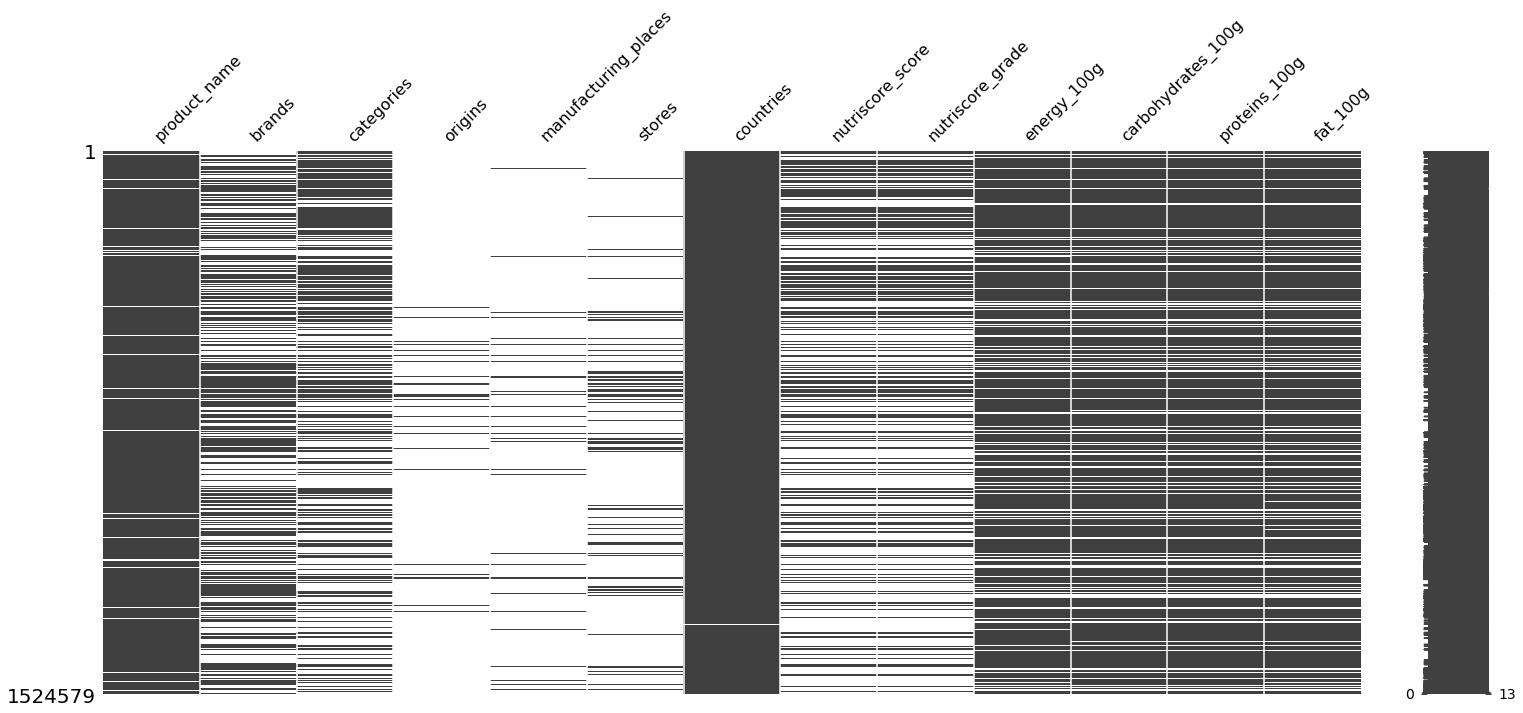

In [10]:
msno.matrix(data)
plt.show()

Pour avoir une idée visuel du numéro de valeurs manquantes par colonne, on peut aussi construir une bar chart.

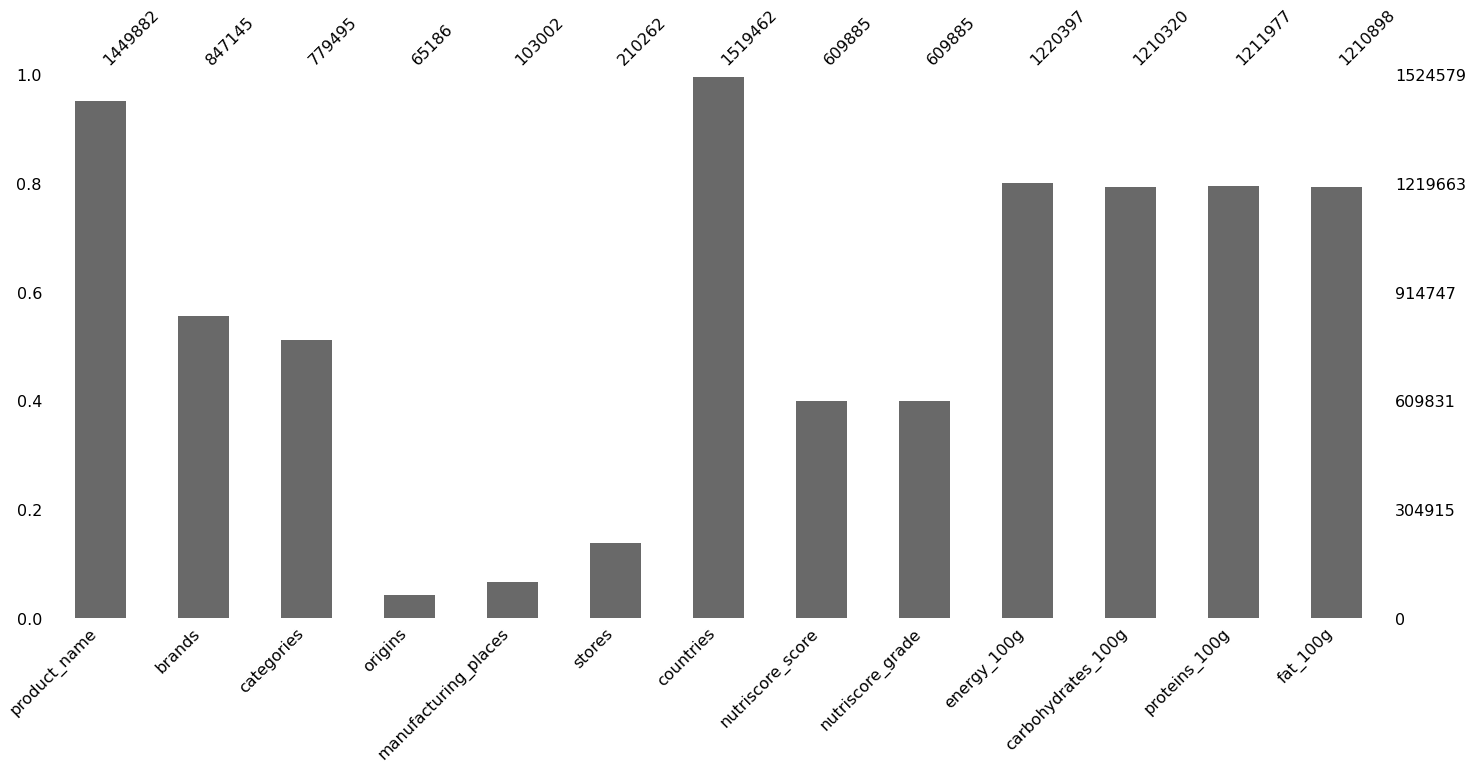

In [11]:
msno.bar(data)
plt.show()

Le *heatmap* suivant nous montre la correlation au niveau de valeurs manquantes entre deux variables.

* Une valeur proche de -1 signifie que si une variable est présente alors il est très probable que l'autre ne le soit pas. 
* Une valeurs proche à 0 signifie qu'il n'y pas de dépence entre le présence ou non d'une variable par rapport à l'autre.
* Une valuer 1 signifie que si une variable est présente alors il est très probale que l'autre le soit aussi.

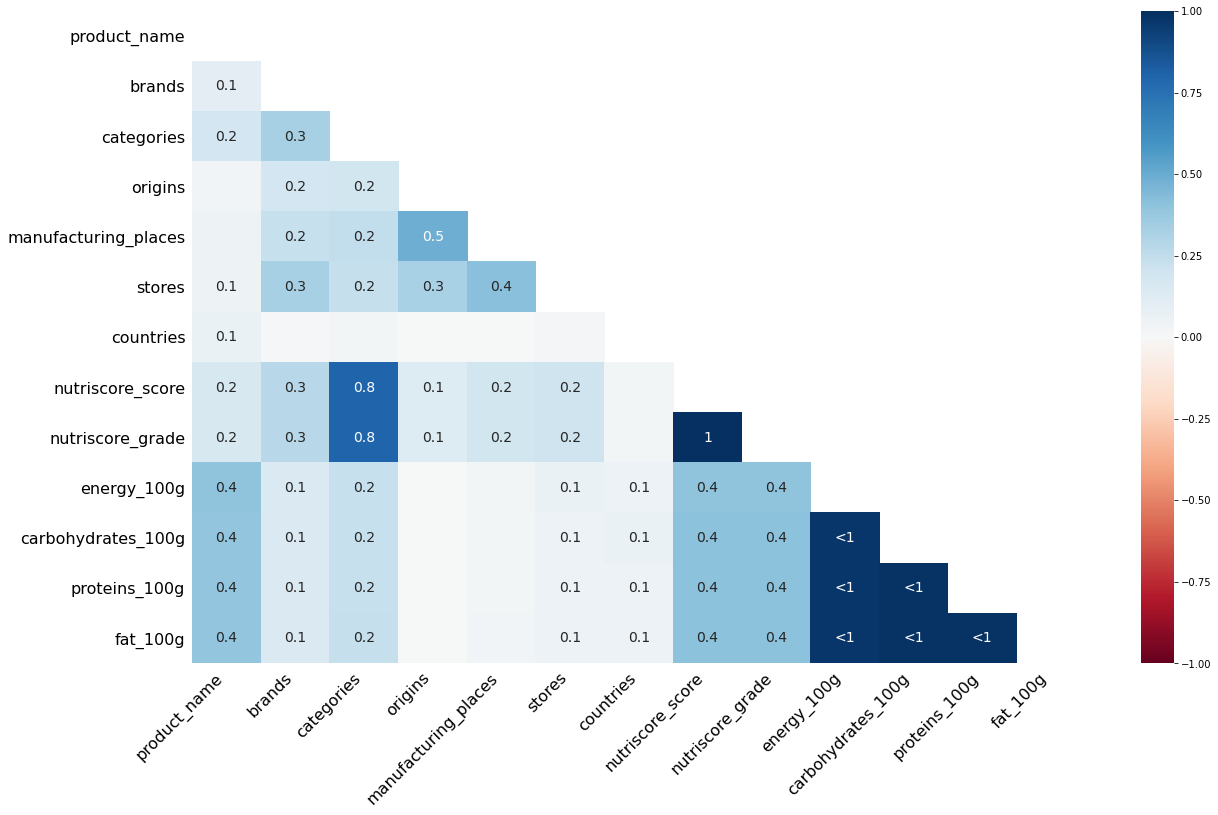

In [12]:
msno.heatmap(data)
plt.show()

Nous savons que les hydrates de carbone apportent 90 % au poids net d'un diète et le 100% de son énergie. Par conséquent, nous attendons une relation entre ce groupe et la variable 'energy_100g'.

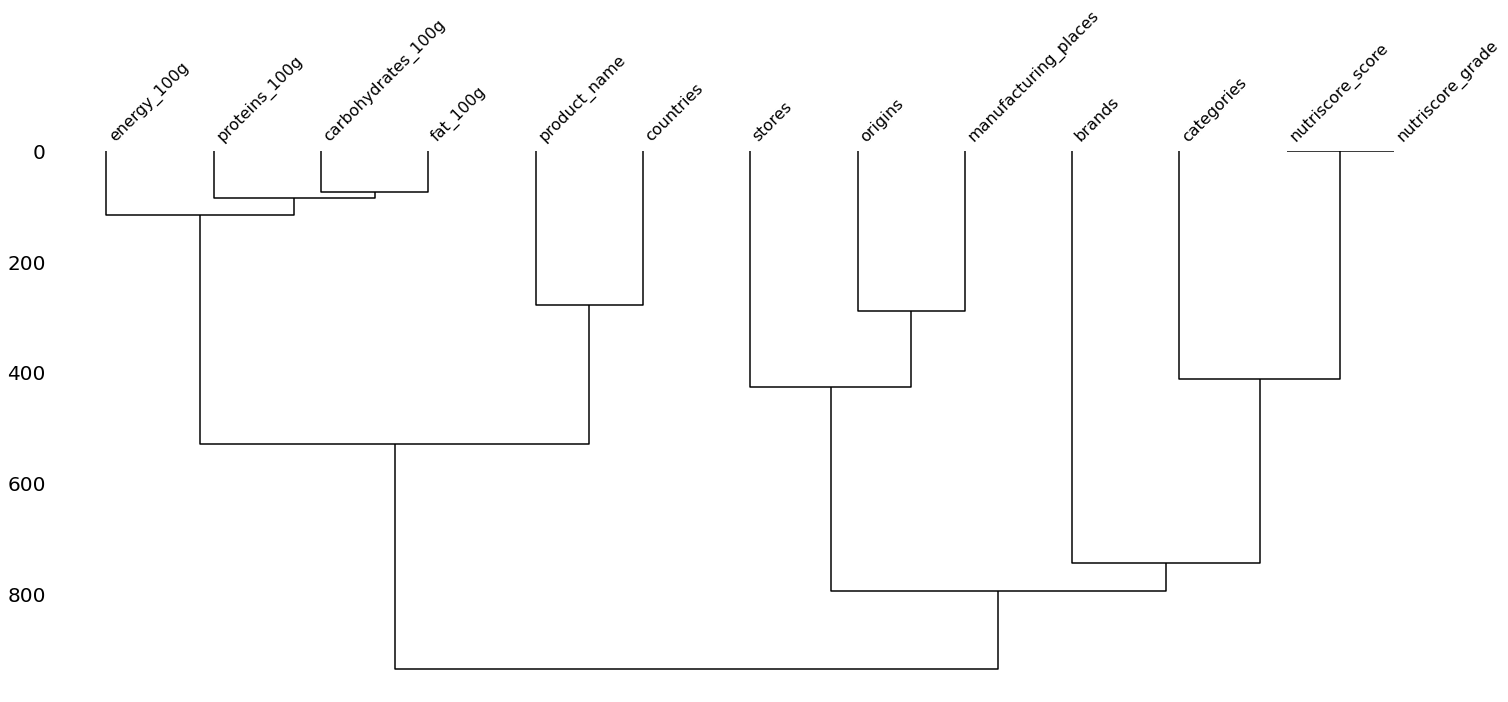

In [13]:
msno.dendrogram(data)
plt.show()

## Doublons

In [14]:
print("Le numéro de doubles présents est {}".format(data.duplicated().sum()))

Le numéro de doubles présents est 116106


Nous suprrimons tous les doublons.

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
print("On a ainsi {} lignes et {} variables".format(data.shape[0],data.shape[1]))

On a ainsi 1408473 lignes et 13 variables


# Marques et produits vendus en France

Dans cette section, nous nous occupons de garder les lignes d'intêret pour notre application.

Pour les valeurs manquantes des variables quantitaves nominales 'product_name', 'categories', 'origins' et 'manufacturing_places', on remplace le NaN

In [17]:
data['product_name'].fillna(value='sans nom', inplace=True)
data['categories'].fillna(value='sans categories', inplace=True)
data['origins'].fillna(value='sans origine', inplace=True)
data['manufacturing_places'].fillna(value='non connu', inplace=True)

Notre projet a besoin des noms des marques, lieus de ventes et le nutrition score. En plus, on s'intéresse uniquement aux produits vendus en France. On garde alors que les lignes contenant cette information.

In [18]:
data = data.drop(data[(data.countries != 'France') & (data.countries != 'en:France')].index)
data = data.drop(data[data.brands.isnull() == True].index)
data = data.drop(data[data.stores.isnull() == True].index)
data = data.drop(data[data.nutriscore_grade.isnull() == True].index)
data = data.drop(data[data.nutriscore_score.isnull() == True].index)

In [19]:
data.isnull().sum()

product_name              0
brands                    0
categories                0
origins                   0
manufacturing_places      0
stores                    0
countries                 0
nutriscore_score          0
nutriscore_grade          0
energy_100g             152
carbohydrates_100g      195
proteins_100g           149
fat_100g                152
dtype: int64

# Outliers

Identifions les outliers des variables qualitatives.

In [20]:
data.describe()

,nutriscore_score,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
count,73751.000000,73599.000000,73556.000000,73602.000000,73599.000000
mean,8.113382,1072.069488,24.262236,8.289230,13.527939
std,8.938960,756.424544,25.740481,7.821557,16.616448
min,-15.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,445.000000,3.000000,2.300000,1.600000
50%,7.000000,971.000000,12.600000,6.200000,7.600000
75%,15.000000,1572.000000,46.200000,12.000000,21.000000
max,36.000000,19305.000000,151.000000,100.000000,100.000000


Une inspection rapide de ```mean```, ```max```, et ```min``` dans le tableau précédent nous permet affirmer qu'il y a plusierus valeurs ou bien aberrantes ou bien atypiques. En effet, une visualisation peut nous aider.

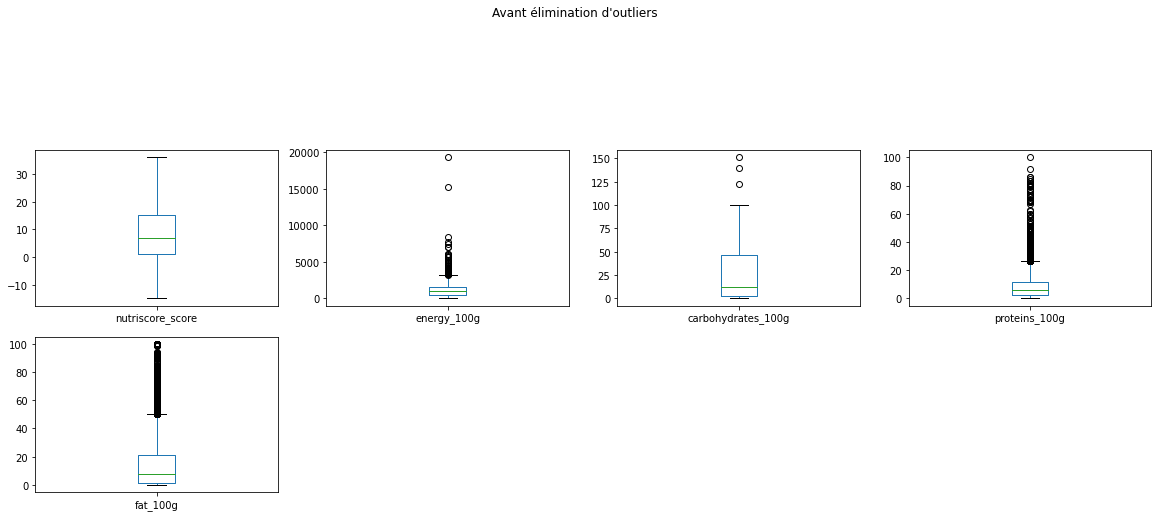

In [22]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title="Avant élimination d'outliers", figsize=(20,20), layout=(6,4))

plt.show()

Éliminons les valuers qui par défintion sortent du lot.

In [23]:
# Pas sûr de la première ligne!!!
data = data.drop(data[data.energy_100g <= 100].index)
data = data[(data['fat_100g'] + data['carbohydrates_100g'] + data['proteins_100g'])<=100]

In [24]:
print("On a maintenant {} observations et {} variables".format(data.shape[0],data.shape[1]))

On a maintenant 70877 observations et 13 variables


Avec cette procédure, on n'a plus de valeurs manquantes dans notre échantillon.

In [25]:
data.isnull().sum()

product_name            0
brands                  0
categories              0
origins                 0
manufacturing_places    0
stores                  0
countries               0
nutriscore_score        0
nutriscore_grade        0
energy_100g             4
carbohydrates_100g      0
proteins_100g           0
fat_100g                0
dtype: int64

Et une description plus appropiée est ainsi obtenue.

In [26]:
data.describe()

,nutriscore_score,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
count,70877.000000,70873.000000,70877.000000,70877.000000,70877.000000
mean,8.433907,1107.177271,25.026172,8.546714,13.932325
std,8.905520,741.229733,25.790265,7.804777,16.574727
min,-15.000000,101.000000,0.000000,0.000000,0.000000
25%,1.000000,481.000000,3.400000,2.800000,1.900000
50%,8.000000,1005.000000,13.300000,6.400000,8.100000
75%,15.000000,1594.000000,48.000000,12.000000,21.700000
max,36.000000,19305.000000,100.000000,92.000000,100.000000


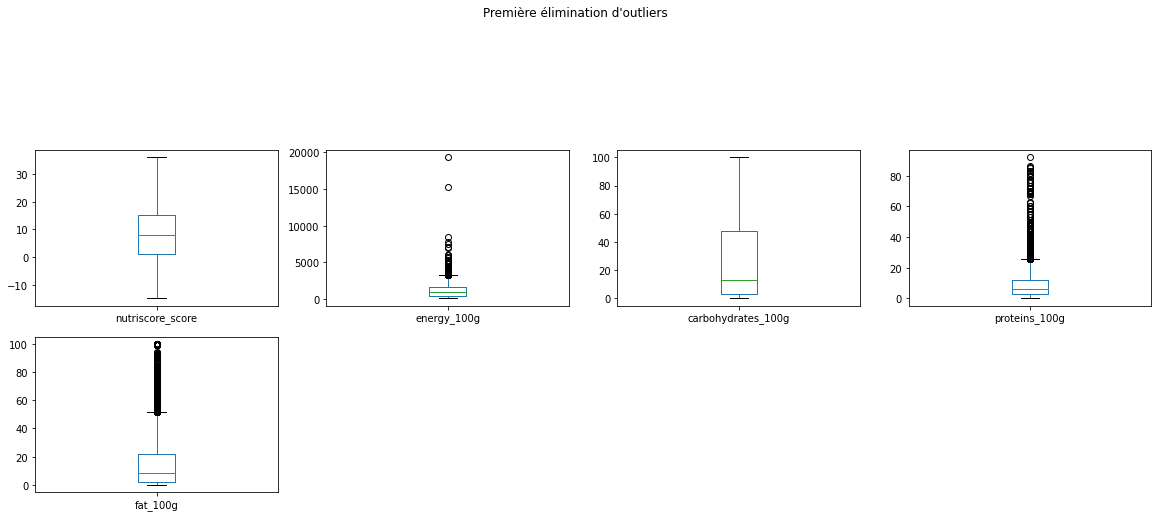

In [28]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title="Première élimination d'outliers", figsize=(20,20), layout=(6,4))

plt.show()

In [29]:
data = data[np.abs(data['energy_100g']-data['energy_100g'].mean())<=(3*data['energy_100g'].std())]
data = data[np.abs(data['fat_100g']-data['fat_100g'].mean())<=(3*data['fat_100g'].std())]
data = data[np.abs(data['carbohydrates_100g']-data['carbohydrates_100g'].mean())<=(3*data['carbohydrates_100g'].std())]
data = data[np.abs(data['proteins_100g']-data['proteins_100g'].mean())<=(3*data['proteins_100g'].std())]

In [30]:
data.describe()

,nutriscore_score,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
count,68523.000000,68523.000000,68523.000000,68523.000000,68523.000000
mean,8.235935,1049.102022,25.773405,8.501066,12.123671
std,8.877236,658.855756,25.864724,7.329734,12.470138
min,-15.000000,101.000000,0.000000,0.000000,0.000000
25%,1.000000,472.000000,4.000000,3.000000,1.800000
50%,8.000000,977.000000,14.000000,6.500000,7.700000
75%,15.000000,1544.000000,49.000000,12.000000,20.000000
max,36.000000,3326.000000,100.000000,32.100000,57.400000


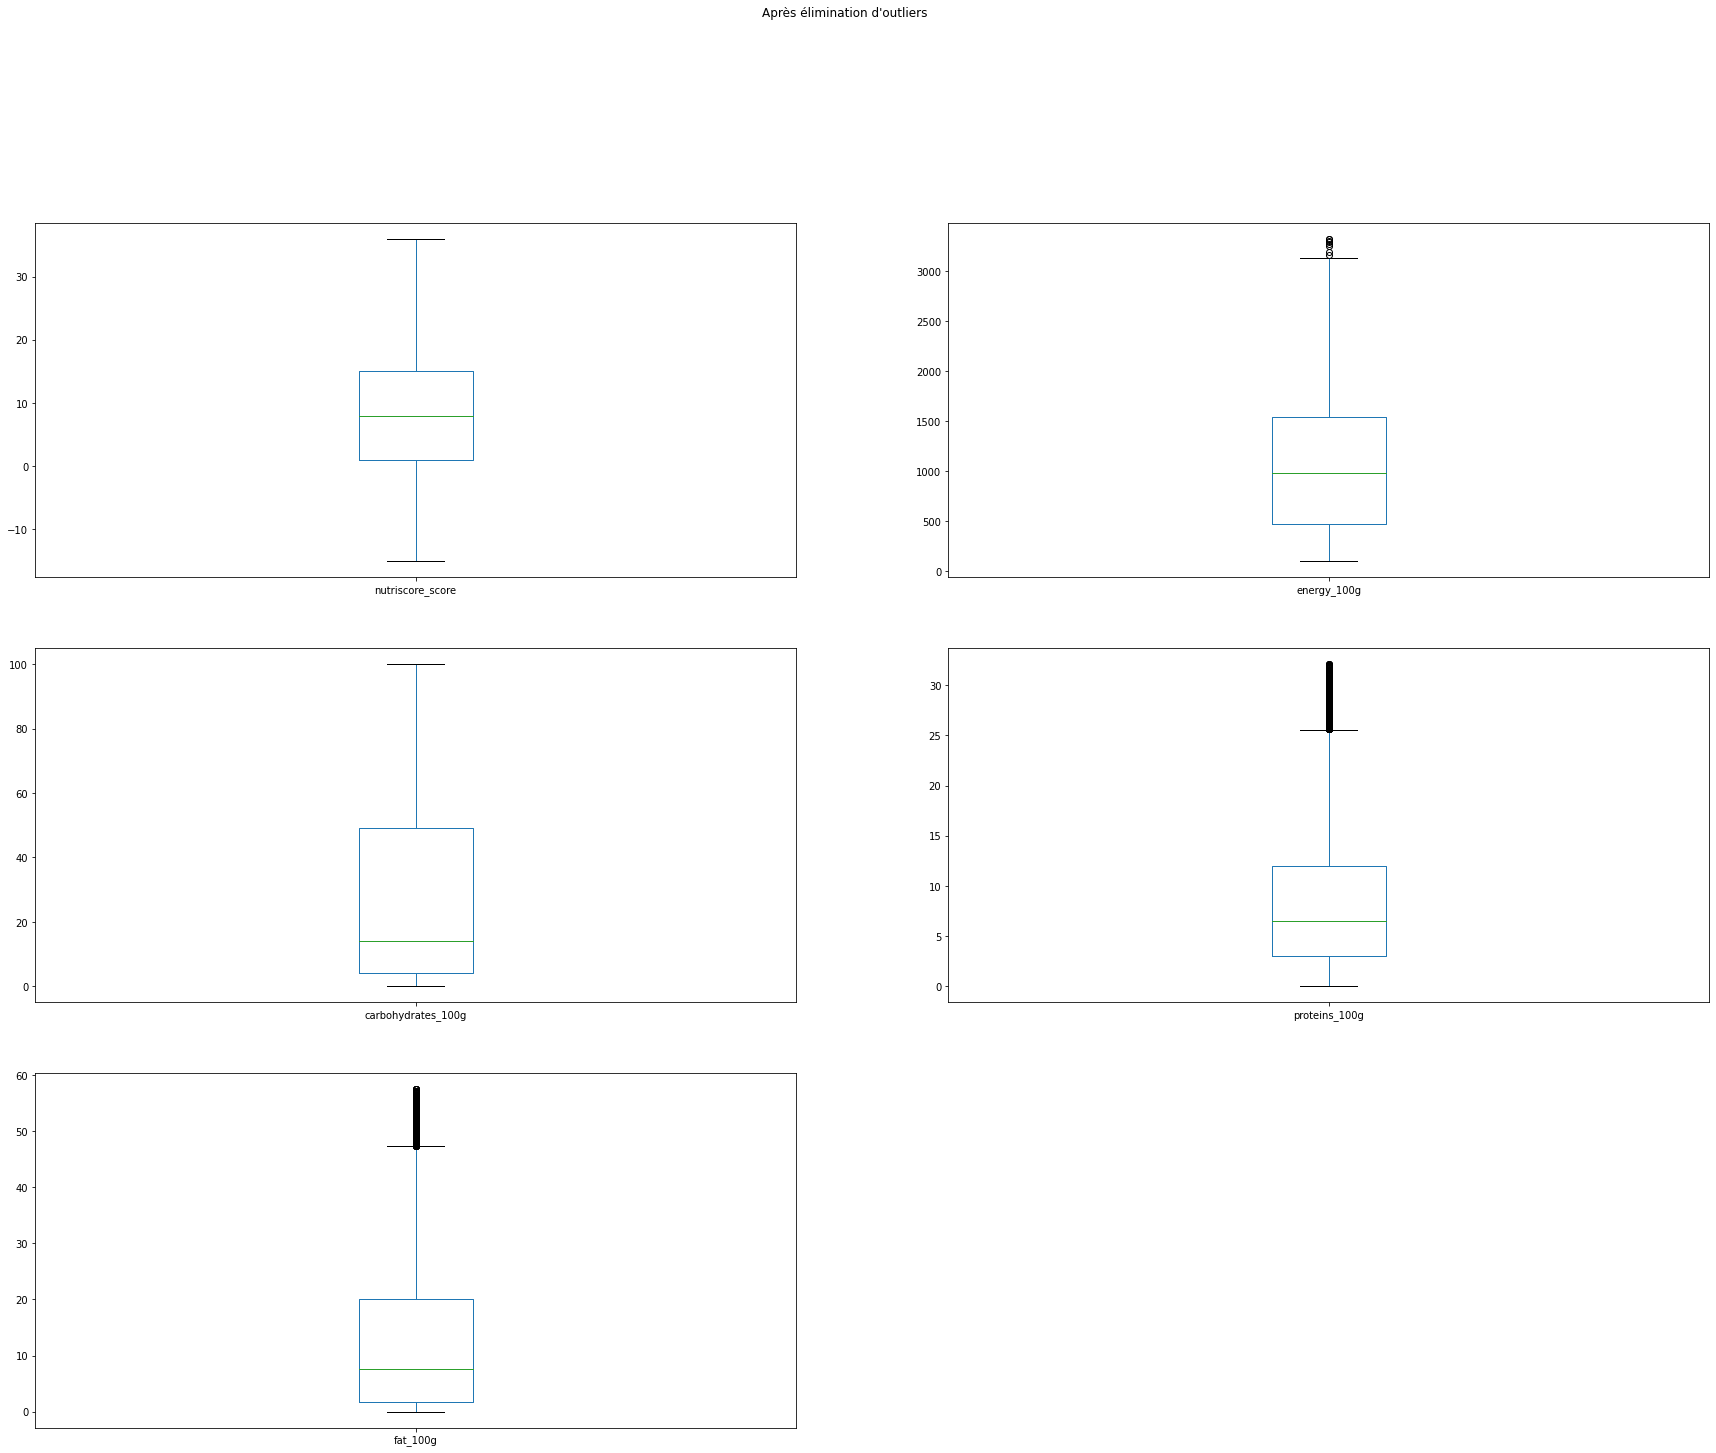

In [31]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title="Après élimination d'outliers", figsize=(30,30), layout=(4,2))

plt.show()

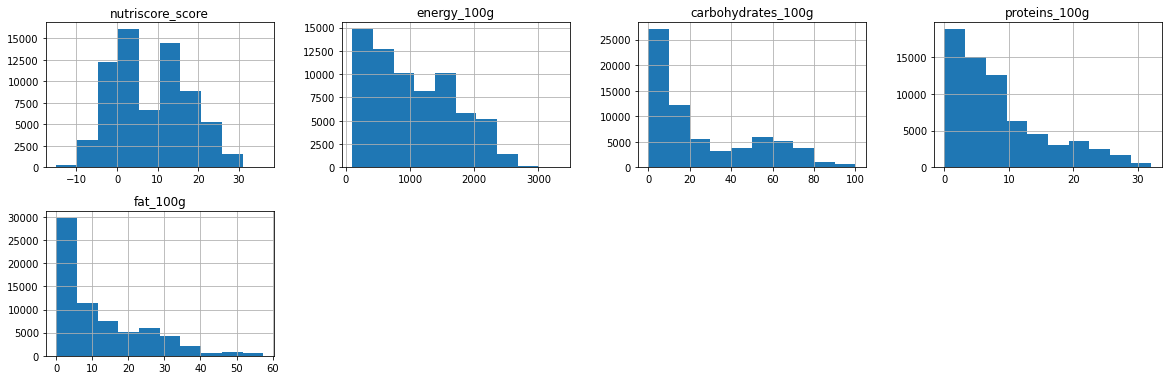

In [32]:
data.hist(figsize=(20,20), layout=(6,4))

plt.show()

In [33]:
print("Le jeu de donnés final aura {} de lignes et {} de colonnes".format(data.shape[0],data.shape[1]))

Le jeu de donnés final aura 68523 de lignes et 13 de colonnes


In [34]:
data = data.reset_index(drop=True)

In [35]:
data

,product_name,brands,categories,origins,manufacturing_places,stores,countries,nutriscore_score,nutriscore_grade,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
0,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",sans origine,non connu,courte paille,France,18.0,d,936.0,29.00,5.1,8.20
1,Blanquette de Volaille et son Riz,Comme J’aime,"Plats préparés, Produits à la viande, Plats pr...",France,France,Comme J'aime,France,0.0,b,450.0,15.30,6.8,2.20
2,Pâte d'Amandes,Alice Délice,"Massepain, Pâtes d'amande",sans origine,non connu,Alice Délice,France,15.0,d,1732.0,77.02,4.2,10.29
3,7Up,"7Up,Pepsico","Aliments et boissons à base de végétaux, Boiss...",sans origine,non connu,Cora Cafétéria,France,13.0,e,177.0,10.40,0.0,0.00
4,Madeleines nature,Bijou,"Snacks, Desserts, Snacks sucrés, Biscuits et g...",sans origine,"Saint Yrieix,France","M2I,Bijou",France,14.0,d,1900.0,55.00,6.0,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68518,Gnocchis à poêler Tradition,Giovanni Rana,"Aliments et boissons à base de végétaux, Alime...",sans origine,non connu,auchan,France,4.0,c,874.0,41.00,7.0,1.90
68519,Œufs durs écalés,Leclerc,"Produits d'élevages, Œufs",sans origine,non connu,Leclerc,France,0.0,b,592.0,0.90,12.0,10.00
68520,Aubergines à la provençale,Auchan bio,"Plats préparés, Légumes préparés, Aubergines p...",sans origine,non connu,Auchan,France,4.0,c,331.0,5.20,1.1,5.40
68521,Pois chiches noirs,BIOSIC,"Aliments et boissons à base de végétaux, Alime...",sans origine,non connu,Biocoop,France,0.0,b,1469.0,47.50,20.5,5.85


In [36]:
print("Le jeu de donnés pour l'analyse exploratoire aura {} de lignes et {} de colonnes".format(data.shape[0],data.shape[1]))

Le jeu de donnés pour l'analyse exploratoire aura 68523 de lignes et 13 de colonnes


Finalement, nous allons sauvgarder ce jeu de données nettoyé pour la suite de notre étude; une copie de celle-ci est dans [ce répertoir](alonso)

In [37]:
data.to_csv("new_data.csv",index=False)